In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
upload_csv_path = '/Users/jingtingdai/Desktop/Master_Thesis/test/app/backend/upload_eval.csv'
upload = pd.read_csv(upload_csv_path)
upload['remain_upload_time'] = upload['upload_time'] - upload['obfuscation_time'] - upload['generate_fake_rows_time']-upload["db_query_time"]-upload["db_write_time"]
print(upload)
upload_bar = upload[['generate_fake_rows_time','obfuscation_time','db_query_time','db_write_time','remain_upload_time','fake_data_rows']]
upload_bar = upload_bar.sort_values(by=['fake_data_rows'])

    data_per_true  real_data_rows  fake_data_rows  generate_fake_rows_time  \
0              10               1               9                 0.021076   
1              10              10              90                 0.020612   
2              10             100             900                 0.096484   
3              10            1000            9000                 0.592132   
4              10           10000           90000                 6.195224   
5              10          100000          900000                54.038272   
6              10               1               9                 0.002117   
7              10              10              90                 0.006226   
8              10             100             900                 0.056657   
9              10            1000            9000                 0.548074   
10             10           10000           90000                 5.346094   
11             10          100000          900000               

<Axes: ylabel='fake_data_rows'>

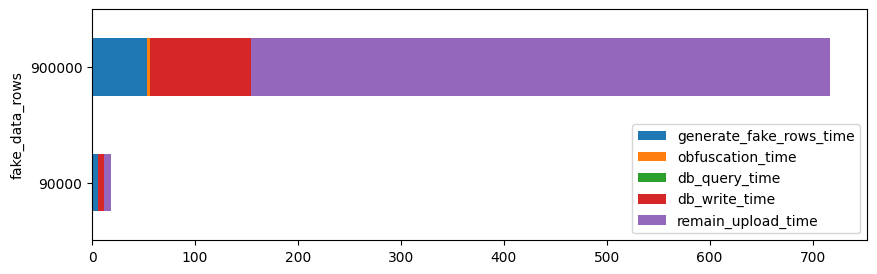

In [27]:
bigger_part = upload_bar.loc[upload_bar['fake_data_rows'] >= 90000]
bigger_part = bigger_part.groupby('fake_data_rows').mean()
bigger_part.plot.barh(stacked=True,figsize=(10,3))

<Axes: ylabel='fake_data_rows'>

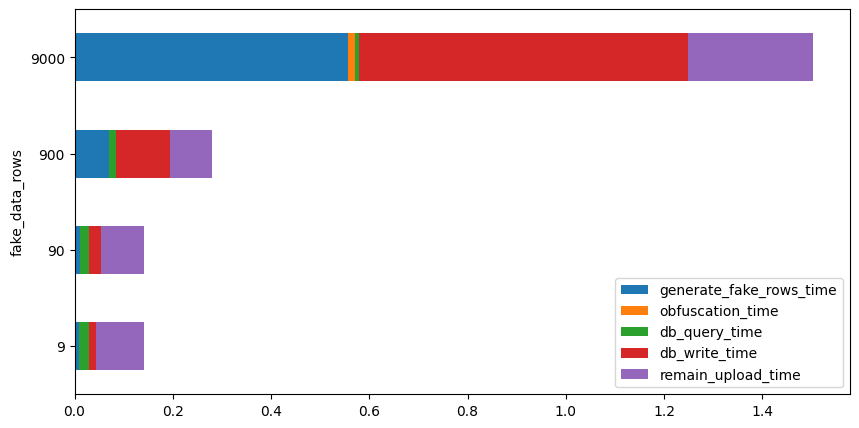

In [28]:
smaller_part = upload_bar.loc[upload_bar['fake_data_rows'] < 90000]
smaller_part = smaller_part.groupby('fake_data_rows').mean()
smaller_part.plot.barh(stacked=True,figsize=(10,5))

/opt/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


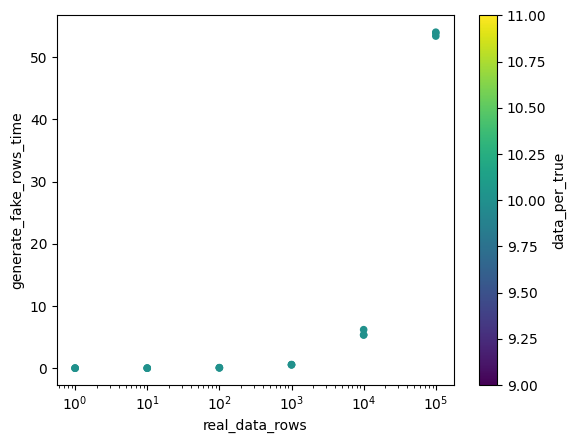

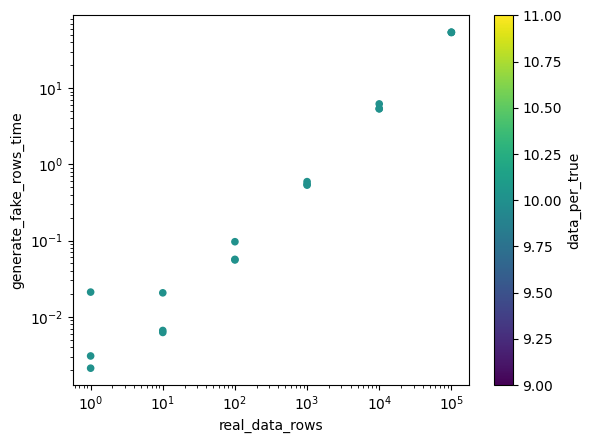

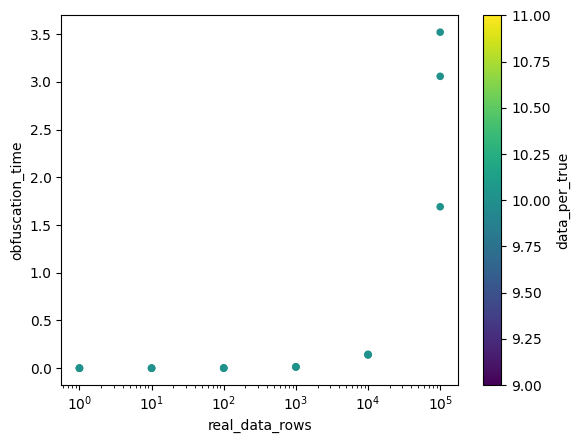

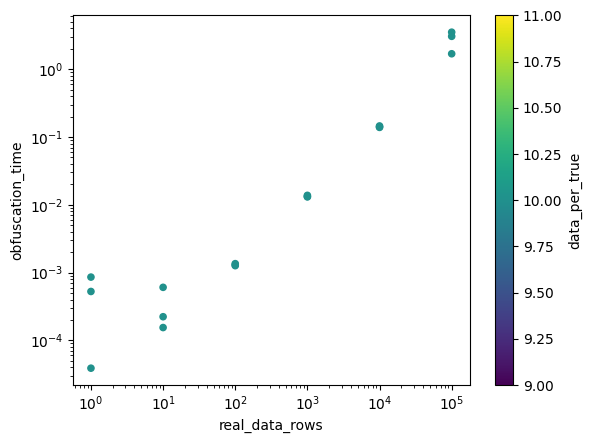

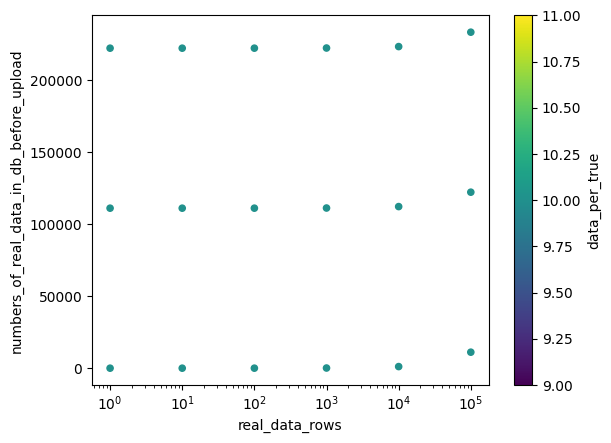

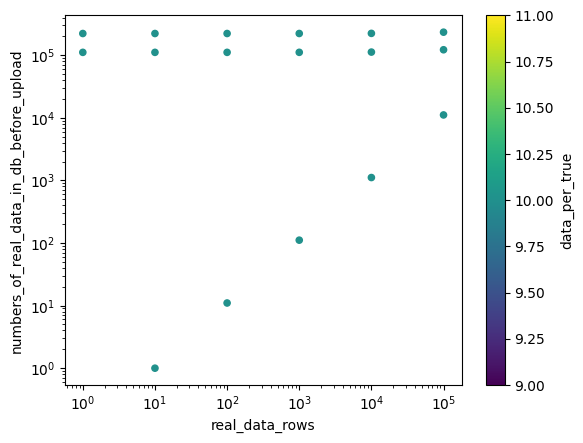

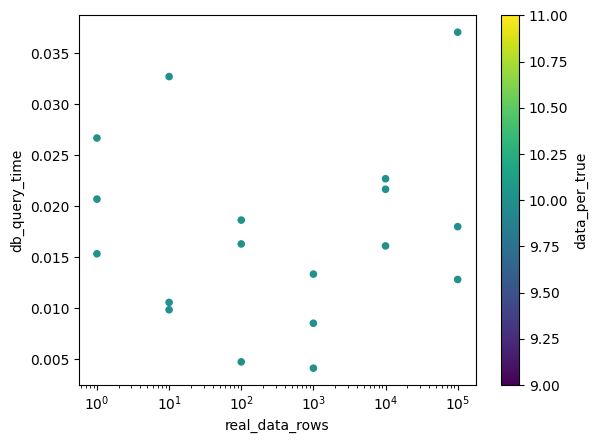

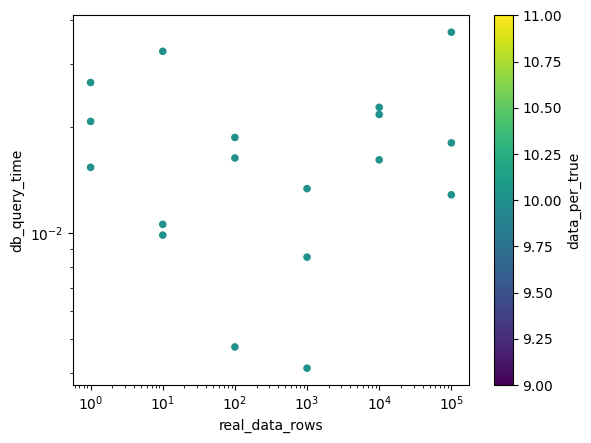

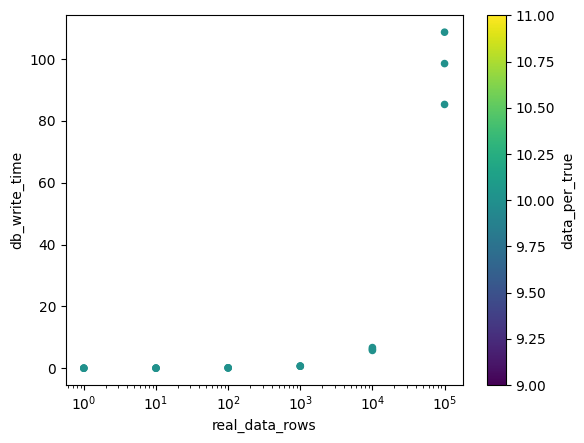

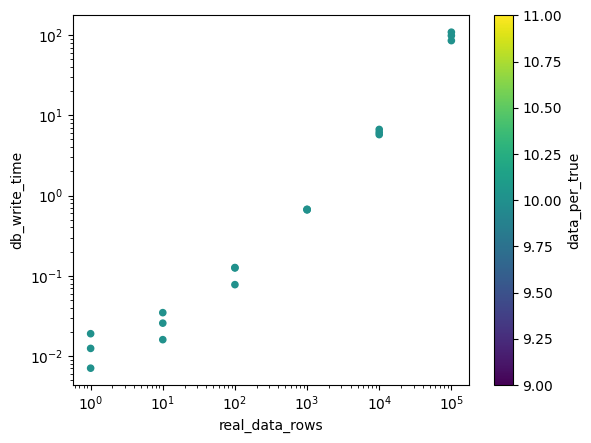

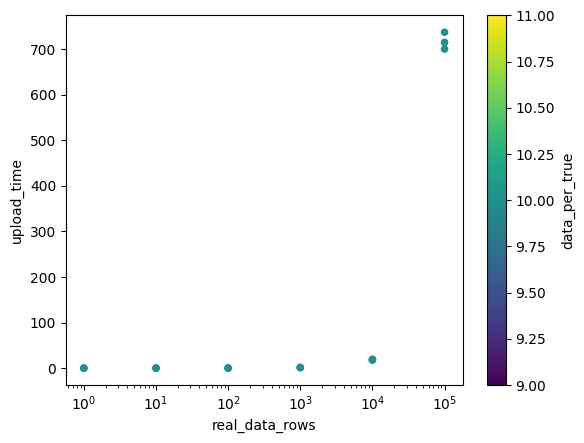

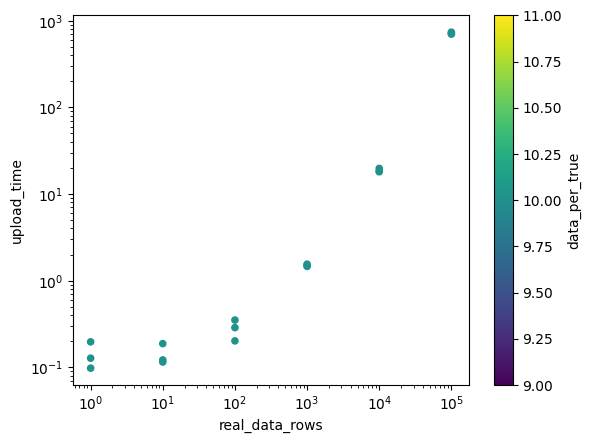

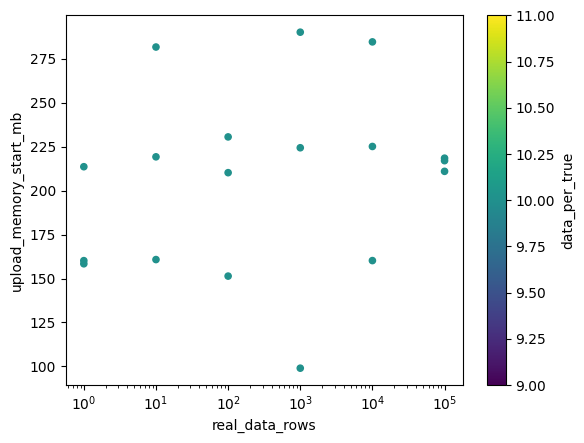

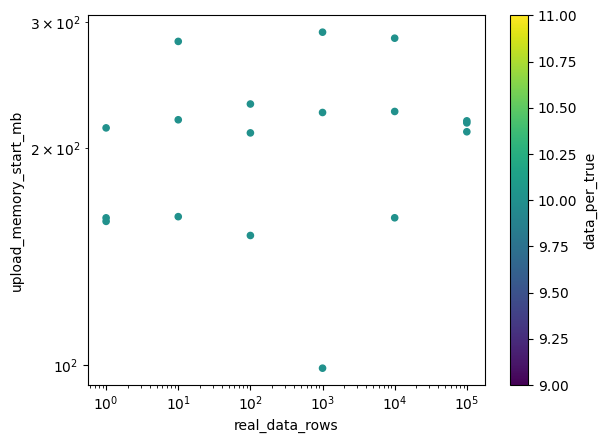

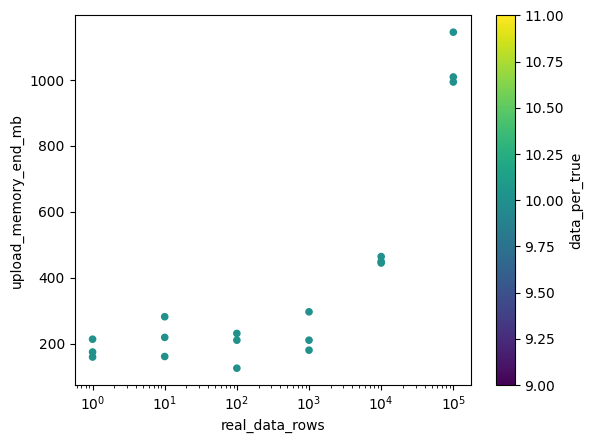

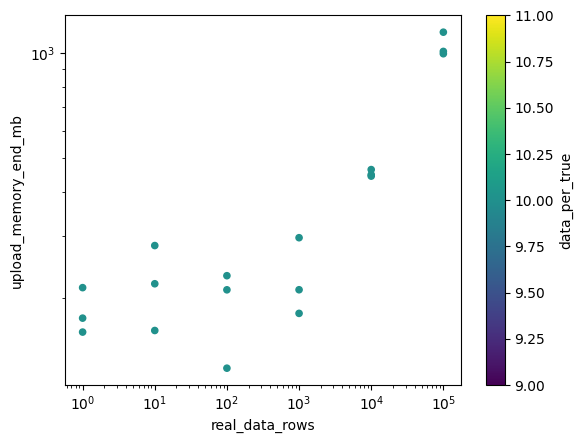

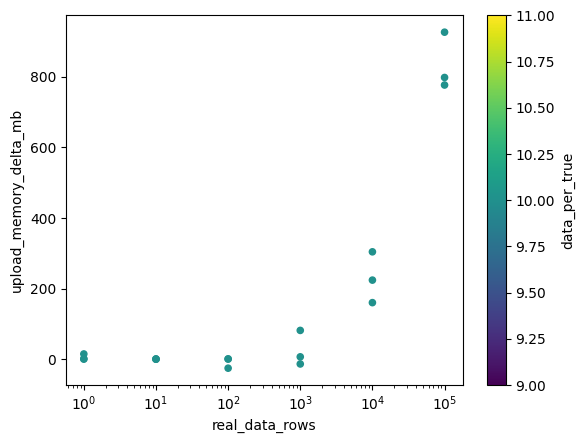

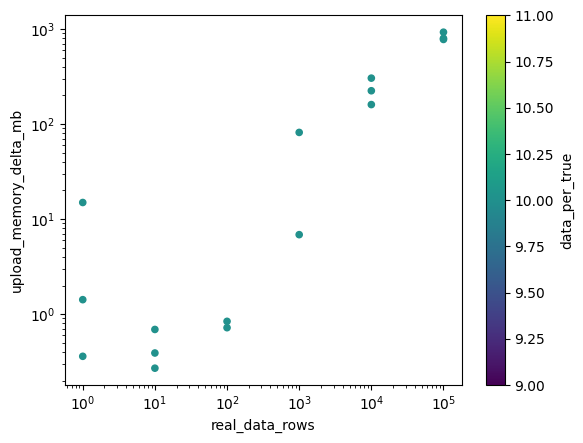

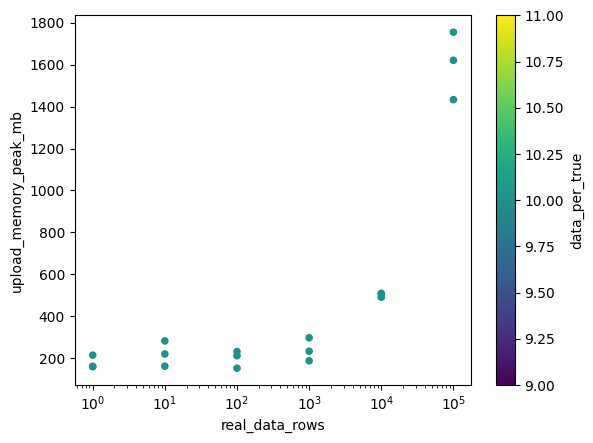

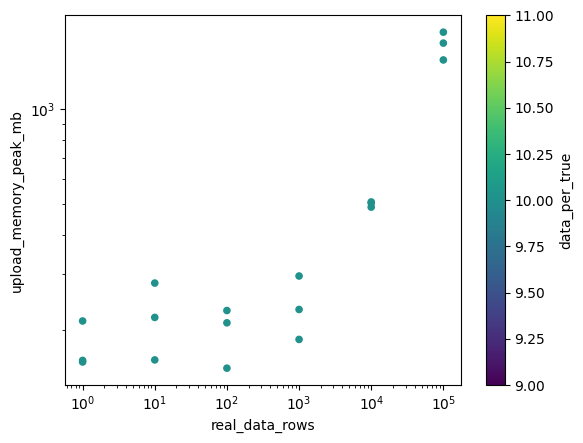

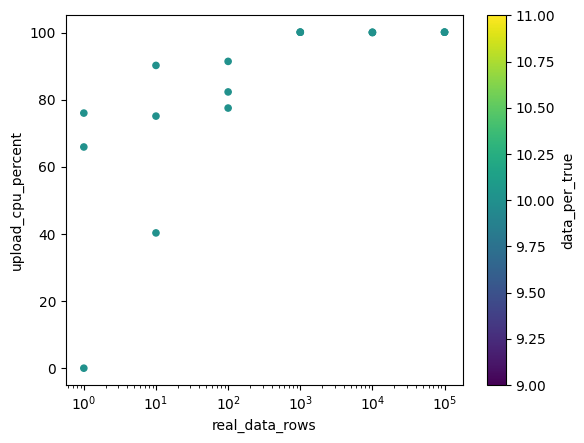

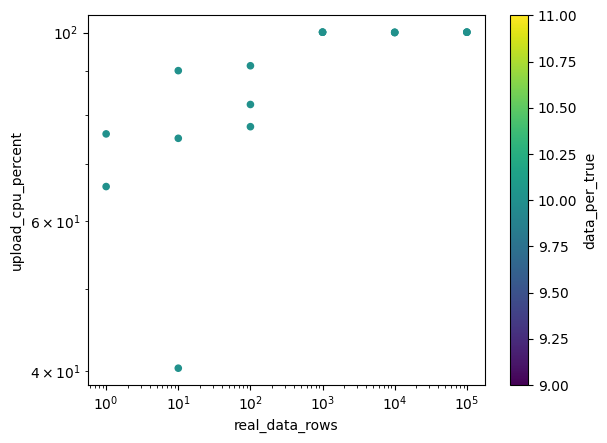

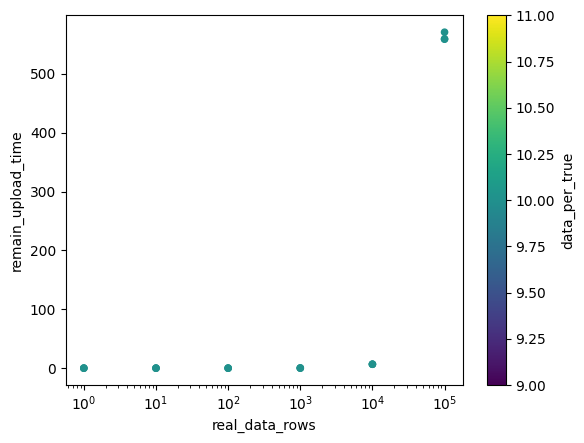

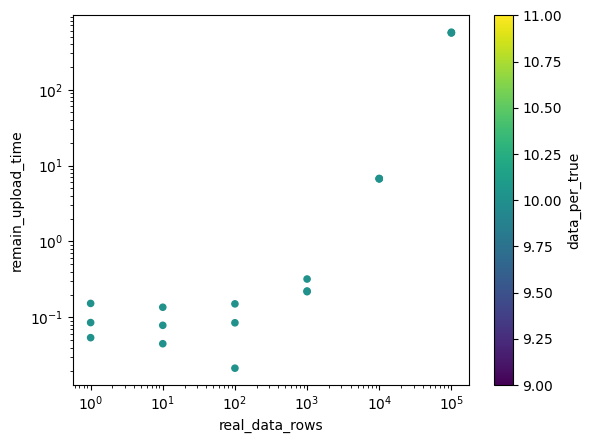

In [29]:
unused_col = ['data_per_true', 'real_data_rows', 'fake_data_rows',"numbers_of_real_data_in_db_before_read"]
for i, col in enumerate(upload.columns):
    if col in unused_col:
        continue
    ax = upload.plot.scatter(x='real_data_rows', y=col,c='data_per_true',colormap='viridis')
    ax.set_xscale('log')
    ax1 = upload.plot.scatter(x='real_data_rows', y=col,c='data_per_true',colormap='viridis')
    ax1.set_xscale('log')
    ax1.set_yscale('log')
  
    



In [30]:
read_csv_path = '/Users/jingtingdai/Desktop/Master_Thesis/test/app/backend/read_eval.csv'
read = pd.read_csv(read_csv_path)
read["remain_read_time"] = read["read_real_data_time"] - read["deobfuscation_time"] - read["db_query_time"]
print(read)
read_bar = read[['deobfuscation_time','db_query_time','remain_read_time','total_read_rows']]
read_bar = read_bar.sort_values(by=['total_read_rows'])

    read_real_data_time  db_query_time  deobfuscation_time  \
0              0.057080       0.040136            0.000077   
1              0.016470       0.005914            0.000158   
2              0.017927       0.008612            0.001351   
3              0.074531       0.050634            0.011485   
4              0.202420       0.141193            0.041380   
5              3.068601       2.508987            0.412657   
6              2.139848       1.595694            0.410266   
7              2.399465       1.851694            0.411998   
8              2.307507       1.760804            0.413615   
9              2.350488       1.828164            0.413759   
10             2.387830       1.813884            0.455711   
11             4.297581       3.251984            0.814697   
12             4.148507       3.090530            0.824694   
13             4.326355       3.242311            0.847515   
14             4.286553       3.230148            0.827655   
15      

<Axes: ylabel='total_read_rows'>

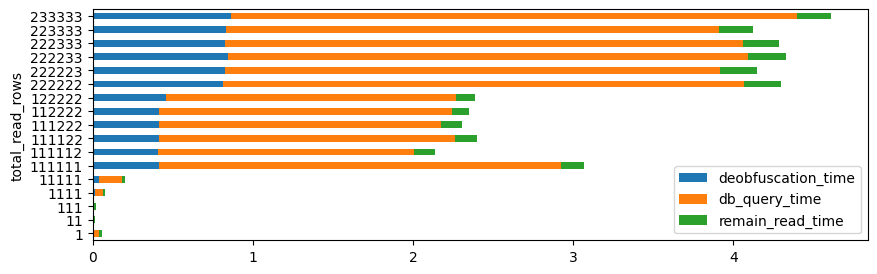

In [31]:
read_bar = read_bar.groupby('total_read_rows').mean()
read_bar.plot.barh(stacked=True,figsize=(10,3))

/opt/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


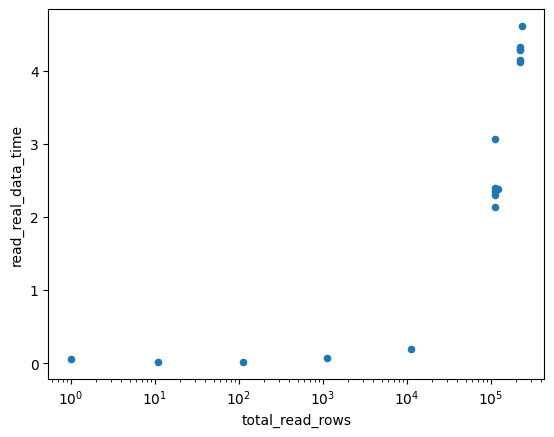

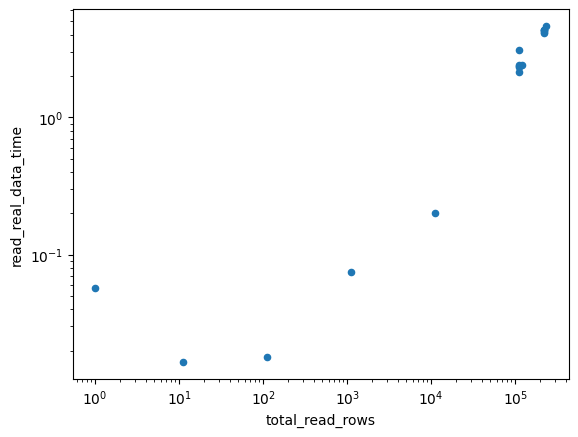

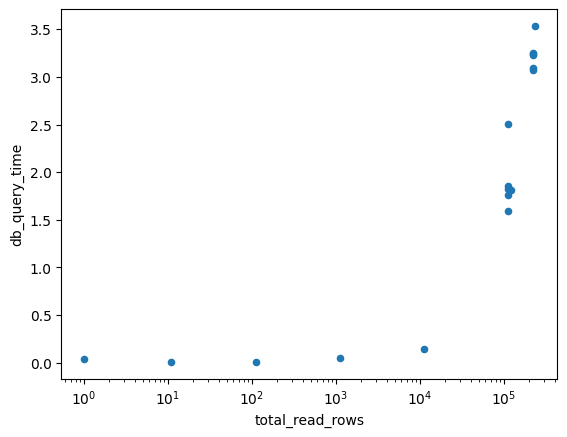

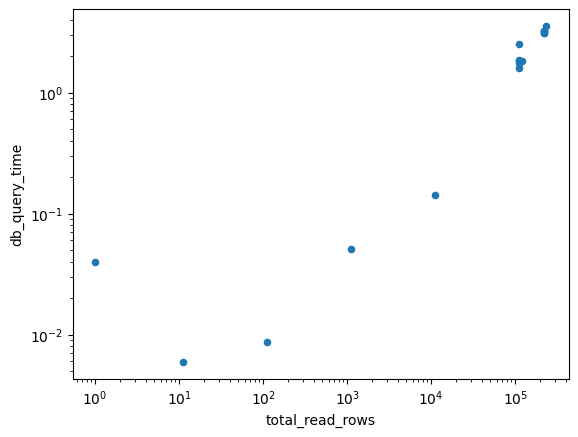

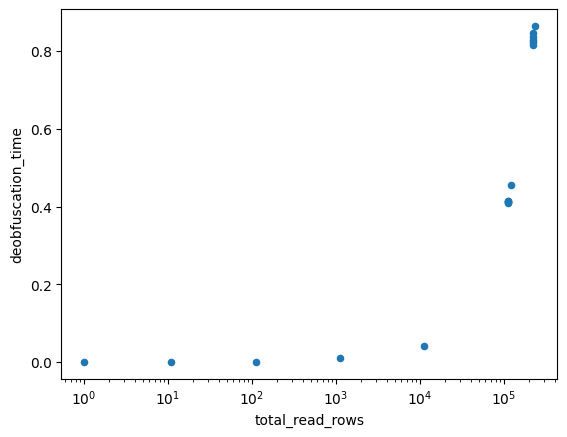

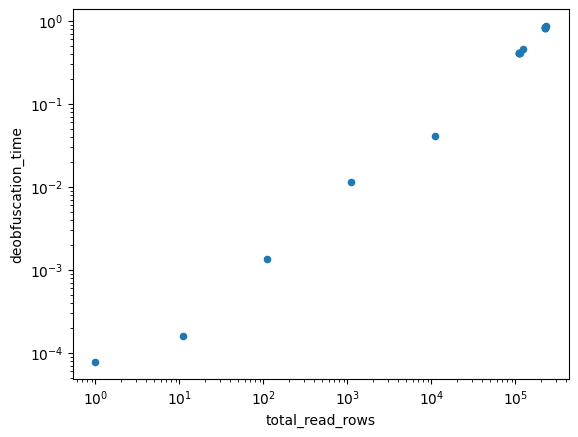

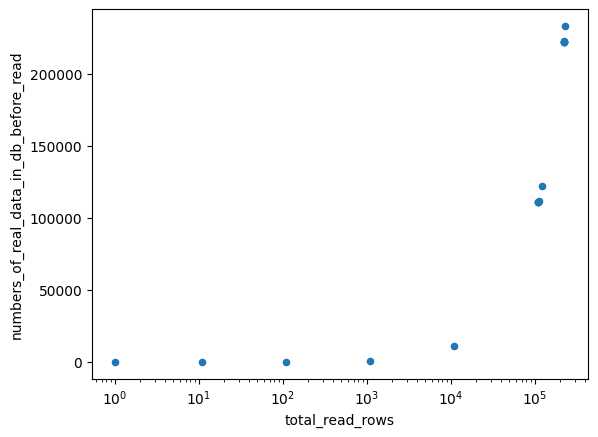

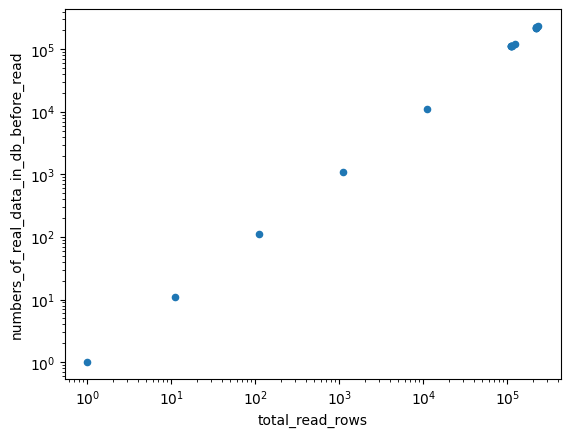

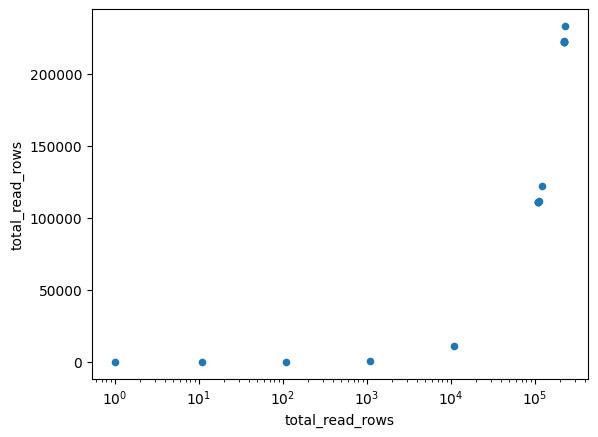

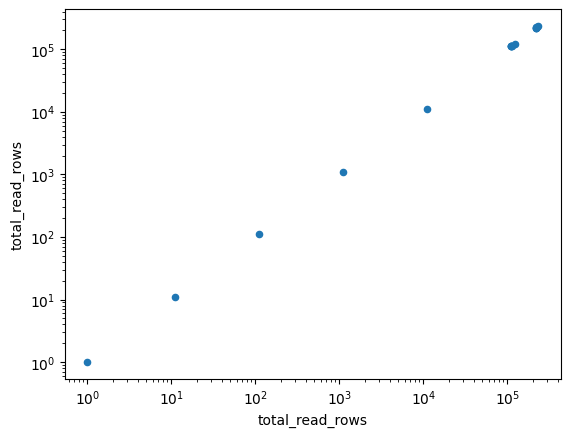

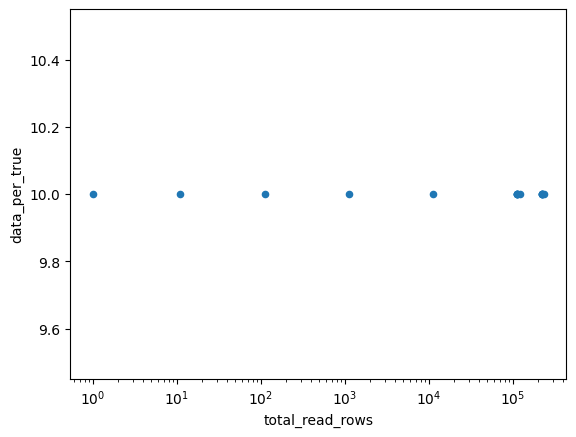

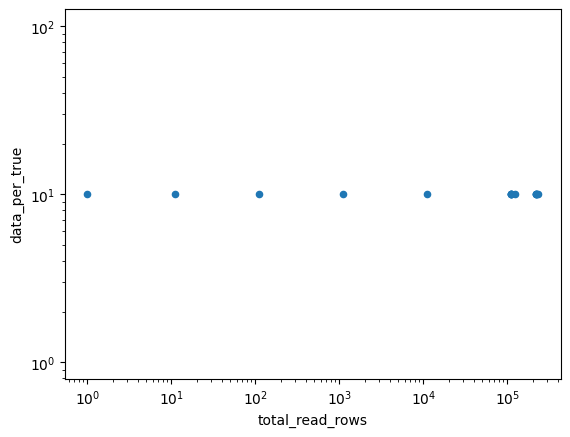

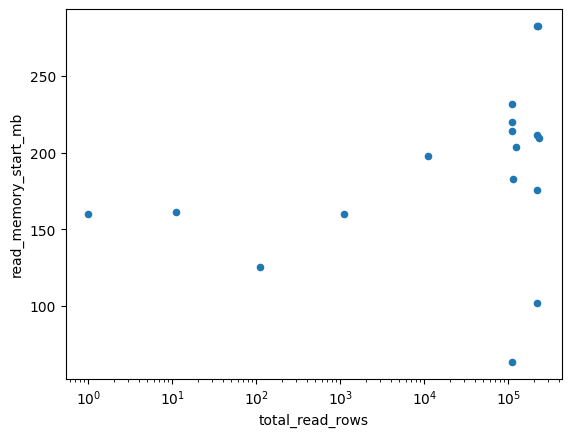

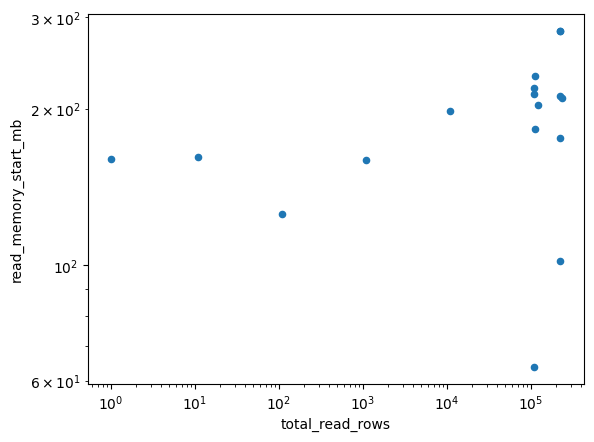

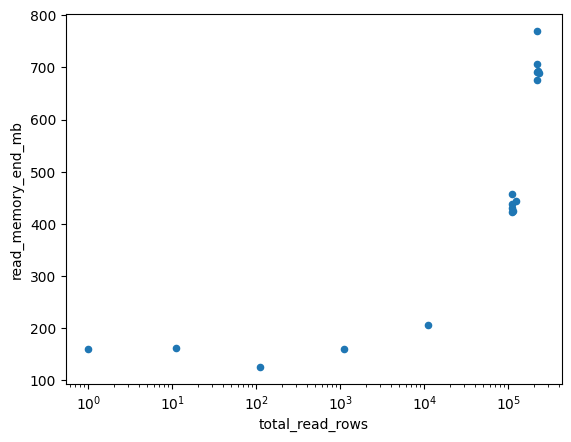

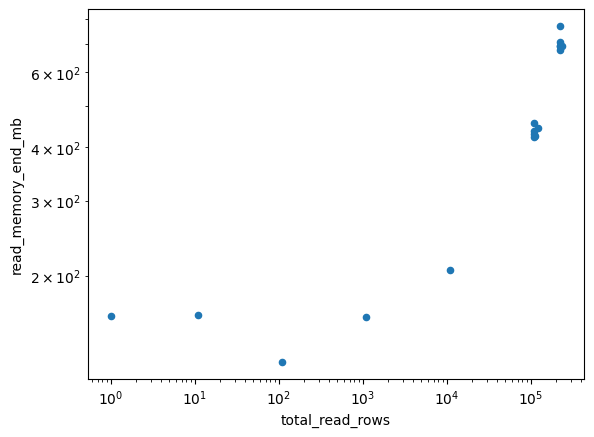

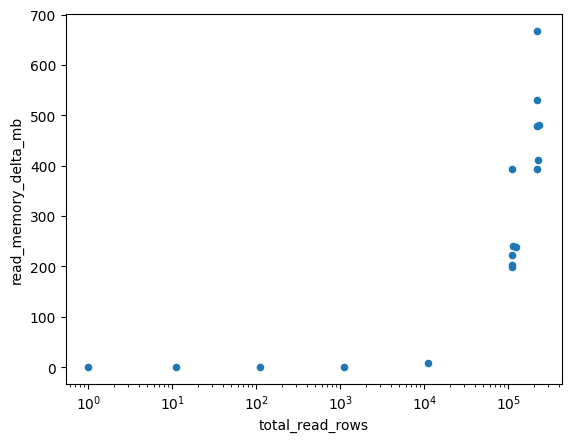

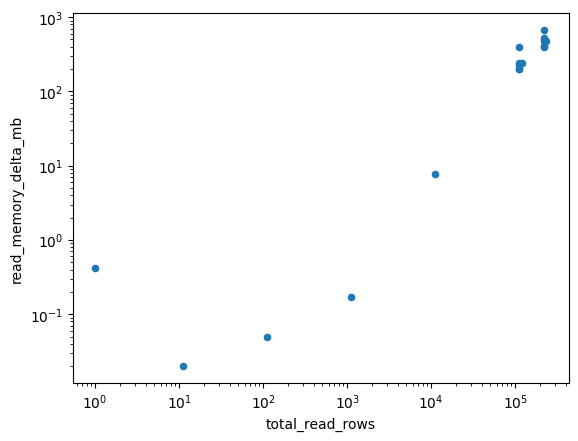

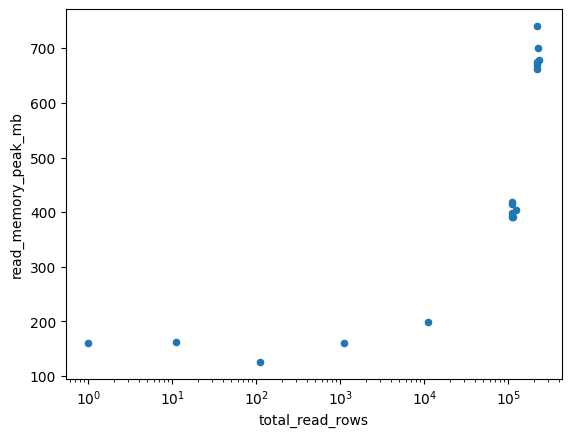

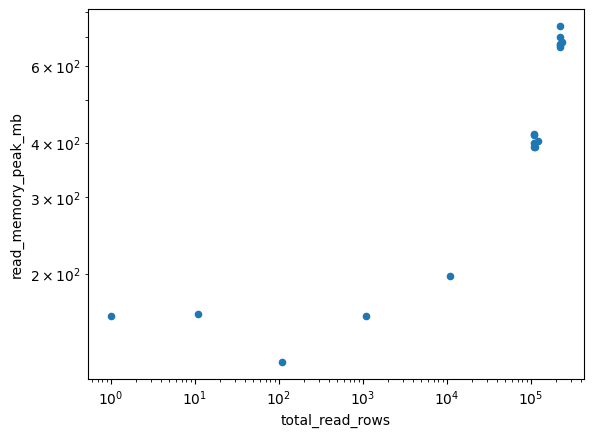

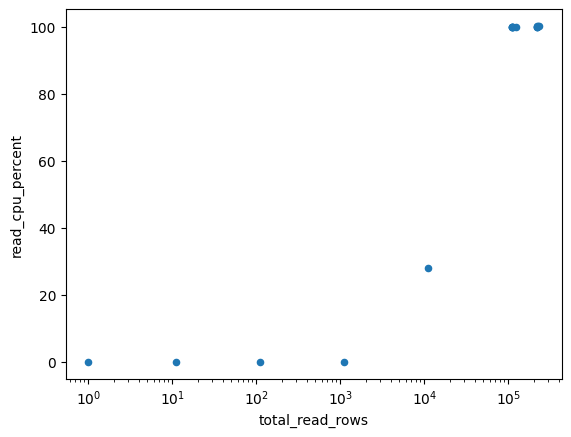

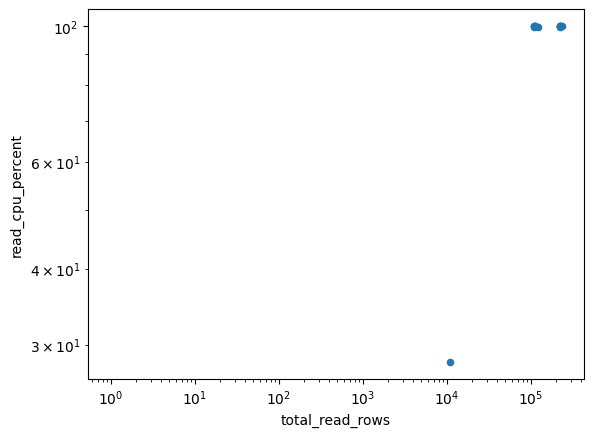

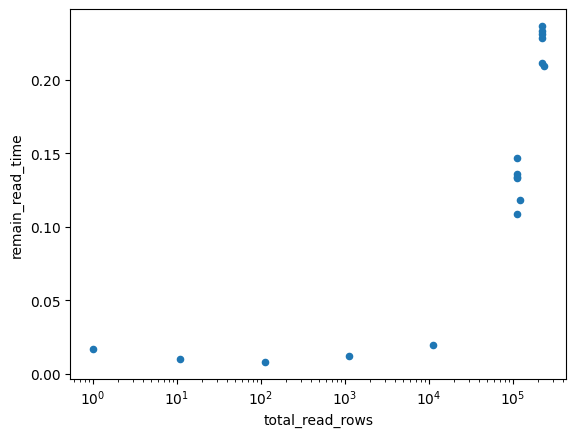

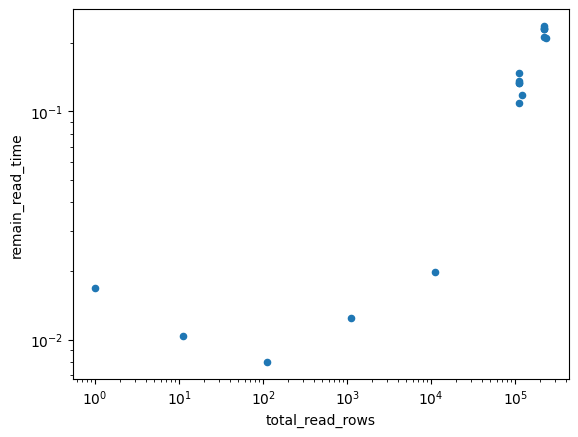

In [32]:
for i, col in enumerate(read.columns):
    ax = read.plot.scatter(x='total_read_rows', y=col,)
    ax.set_xscale('log')
    ax1 = read.plot.scatter(x='total_read_rows', y=col,)
    ax1.set_xscale('log')
    ax1.set_yscale('log')